## Horas de estudio y aprobar el examen de Modelos Lineales Generalizados

In [16]:
Hours=c(0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5) #horas de estudio
Pass=c(0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1) #Aprobar el examen
# O es No aprobar
# 1 es Sí aprobar

In [17]:
df1=data.frame(Hours,Pass)
df1

Hours,Pass
<dbl>,<dbl>
0.50,0
0.75,0
1.00,0
1.25,0
1.50,0
1.75,0
1.75,1
2.00,0
2.25,1


In [23]:
#Crear nuestro MLG con glm 
logit0=glm(Pass~Hours,data=df1,family='binomial') #en rls o rlm, la función es lm
#logit0 es un objeto glm 
summary(logit0)


Call:
glm(formula = Pass ~ Hours, family = "binomial", data = df1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70557  -0.57357  -0.04654   0.45470   1.82008  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -4.0777     1.7610  -2.316   0.0206 *
Hours         1.5046     0.6287   2.393   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 16.060  on 18  degrees of freedom
AIC: 20.06

Number of Fisher Scoring iterations: 5


In [26]:
logLik(logit0) #Esto es la verosimilitud del modelo log0

'log Lik.' -8.029878 (df=2)

In [27]:
-2*logLik(logit0) #Esto es la devianza del modelo log0 (-2*logLik(log0))

'log Lik.' 16.05976 (df=2)

### Construir el modelo nulo de regresión logística para df1

In [30]:
logit_nulo=glm(Pass~1,data=df1,family='binomial')
summary(logit_nulo)


Call:
glm(formula = Pass ~ 1, family = "binomial", data = df1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.177   0.000   1.177   1.177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.930e-17  4.472e-01       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 27.726  on 19  degrees of freedom
AIC: 29.726

Number of Fisher Scoring iterations: 2


In [33]:
logLik(logit_nulo)

'log Lik.' -13.86294 (df=1)

In [31]:
library(lmtest)

In [32]:
lrtest(logit0,logit_nulo)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-8.029878,NA,NA,NA
2,1,-13.862944,-1,11.66613,0.0006364826


In [39]:
#Deviance
with(logit0,null.deviance-deviance) #pull 

[1] 11.66613

In [38]:
logit0$null.deviance-logit0$deviance

[1] 11.66613

In [40]:
with(logit0,pchisq(null.deviance-deviance,df.null-df.residual,lower.tail=FALSE))

[1] 0.0006364826

In [34]:
class(logit0)

[1] "glm" "lm"

In [19]:
#Hacer las observaciones pronósticadas (y gorrito)
df1$fit_logodds=predict(logit0,list(df1$Hours),type='term')
df1$fit_prob=predict(logit0,list(df1$Hours),type='response')

In [20]:
getwd()

[1] "D:/PythonSSD"

In [21]:
df1
write.csv(df1,'logistica.csv')

Hours,Pass,fit_logodds,fit_prob
<dbl>,<dbl>,"<dbl[,1]>",<dbl>
0.50,0,-3.4418764,0.03471034
0.75,0,-3.0657151,0.04977295
1.00,0,-2.6895537,0.07089196
1.25,0,-2.3133923,0.10002862
1.50,0,-1.9372310,0.13934447
1.75,0,-1.5610696,0.19083650
1.75,1,-1.5610696,0.19083650
2.00,0,-1.1849083,0.25570318
2.25,1,-0.8087469,0.33353024


In [22]:
df1$pass_pred=ifelse(df1$fitted<0.5,0,1)

ERROR: Error in `$<-.data.frame`(`*tmp*`, pass_pred, value = logical(0)): replacement has 0 rows, data has 20


In [ ]:
df1

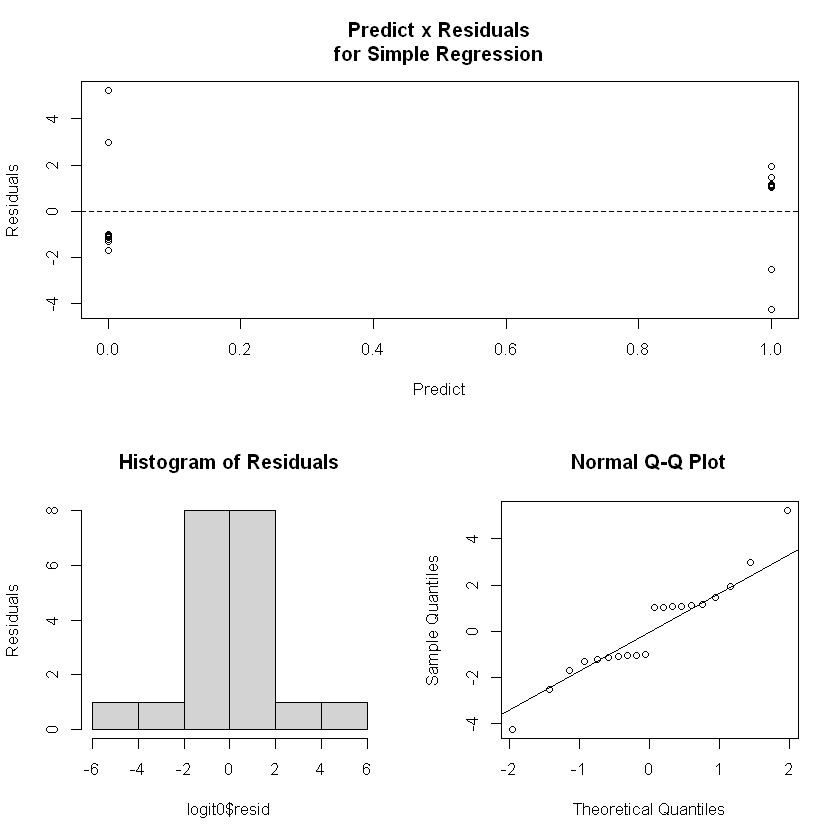

In [41]:
#Ayuda visual de los residuos
layout(matrix(c(1,1,2,3),2,2,byrow=T)) #matriz para layout
plot(logit0$resid~df1$Pass[order(df1$Pass)],
 main="Predict x Residuals\nfor Simple Regression",
 xlab="Predict", ylab="Residuals")
abline(h=0,lty=2)
#Histogram of Residuals
hist(logit0$resid, main="Histogram of Residuals",
 ylab="Residuals")
#Q-Q Plot
qqnorm(logit0$resid)
qqline(logit0$resid)

In [ ]:
#Deviance
with(logit0,null.deviance-deviance)

In [ ]:
with(logit0,df.null-df.residual)

In [ ]:
with(logit0,pchisq(null.deviance-deviance,df.null-df.residual,lower.tail=FALSE))

In [ ]:
library(lmtest)

In [29]:
logit00=glm(Pass~1,data=df1,family='binomial')
summary(logit00)


Call:
glm(formula = Pass ~ 1, family = "binomial", data = df1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.177   0.000   1.177   1.177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.930e-17  4.472e-01       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 27.726  on 19  degrees of freedom
AIC: 29.726

Number of Fisher Scoring iterations: 2


In [24]:
lrtest(logit0,logit00)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-8.029878,NA,NA,NA
2,1,-13.862944,-1,11.66613,0.0006364826


In [25]:
logLik(logit0)

'log Lik.' -8.029878 (df=2)

## Ejercicio 2

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

### Tarea: Construir un modelo de regresión logística para este ejemplo


In [44]:
mydata<- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(mydata,10)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2
7,1,560,2.98,1
8,0,400,3.08,2
9,1,540,3.39,3


In [48]:
summary(mydata)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [49]:
sapply(mydata,mean) #apply(mydata,2,mean)

admit      gre      gpa     rank 
  0.3175 587.7000   3.3899   2.4850

In [ ]:
admit_count=count()
gre_mean=mean(mydata$gre)
gpa_mean=mean(mydata$gre)


In [52]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'purrr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [54]:
library(dplyr)

In [69]:
a=table(mydata$admit)
a


  0   1 
273 127 

In [70]:
a/length(mydata$admit) #Datos desbalanceados


     0      1 
0.6825 0.3175 

In [71]:
rank_count=table(mydata$rank)/length(mydata$rank)
rank_count


     1      2      3      4 
0.1525 0.3775 0.3025 0.1675 

In [77]:
mydata%>% #operador %>% pipe
 group_by(admit,rank)%>%
 summarize(count_rank=n(),
           mean_gre=round(mean(gre),1),
           mean_gpa=round(mean(gpa),1)) #¿Cómo ponemos rank?

`summarise()` has grouped output by 'admit'. You can override using the `.groups` argument.



admit,rank,count_rank,mean_gre,mean_gpa
<int>,<int>,<int>,<dbl>,<dbl>
0,1,28,582.9,3.3
0,2,97,586.6,3.3
0,3,93,562.4,3.4
0,4,55,562.9,3.3
1,1,33,636.4,3.5
1,2,54,613.0,3.4
1,3,28,616.4,3.5
1,4,12,603.3,3.4


In [78]:
#Hacer dummy rank (1:4)...varios paquetes, pero es sencillo con base R
mydata$rank_1=ifelse(mydata$rank==1,1,0)
mydata$rank_2=ifelse(mydata$rank==2,1,0)
mydata$rank_3=ifelse(mydata$rank==3,1,0)
mydata$rank_4=ifelse(mydata$rank==4,1,0)
head(mydata,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0
2,1,660,3.67,3,0,0,1,0
3,1,800,4.00,1,1,0,0,0
4,1,640,3.19,4,0,0,0,1
5,0,520,2.93,4,0,0,0,1
6,1,760,3.00,2,0,1,0,0
7,1,560,2.98,1,1,0,0,0
8,0,400,3.08,2,0,1,0,0
9,1,540,3.39,3,0,0,1,0


### Tarea: Hacer gráficas para ver la distribución de GPA & GRE según ranks y admitidos (diagrama de cajas)

In [79]:
logit1=glm(admit~gre+gpa,data=mydata,family='binomial')
summary(logit1)


Call:
glm(formula = admit ~ gre + gpa, family = "binomial", data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


In [82]:
mydata$rank=as.factor(mydata$rank)
logit2=glm(admit~gre+gpa+rank,data=mydata,family='binomial')
summary(logit2)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [83]:
logit3=glm(admit~gre+gpa+rank_2+rank_3+rank_4,data=mydata,family='binomial')
summary(logit3)
#https://www.theanalysisfactor.com/odds-ratio-categorical-predictor/


Call:
glm(formula = admit ~ gre + gpa + rank_2 + rank_3 + rank_4, family = "binomial", 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank_2      -0.675443   0.316490  -2.134 0.032829 *  
rank_3      -1.340204   0.345306  -3.881 0.000104 ***
rank_4      -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [84]:
logit4=glm(admit~gre+gpa+rank_1+rank_2+rank_3,data=mydata,family='binomial')
summary(logit4)
#https://www.theanalysisfactor.com/odds-ratio-categorical-predictor/


Call:
glm(formula = admit ~ gre + gpa + rank_1 + rank_2 + rank_3, family = "binomial", 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.541443   1.138072  -4.869 1.12e-06 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank_1       1.551464   0.417832   3.713 0.000205 ***
rank_2       0.876021   0.366735   2.389 0.016908 *  
rank_3       0.211260   0.392857   0.538 0.590748    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [86]:
mydata$prob_admit=predict(logit3,mydata,type='response')
head(mydata,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,prob_admit
,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0,0.1726265
2,1,660,3.67,3,0,0,1,0,0.2921750
3,1,800,4.00,1,1,0,0,0,0.7384082
4,1,640,3.19,4,0,0,0,1,0.1783846
5,0,520,2.93,4,0,0,0,1,0.1183539
6,1,760,3.00,2,0,1,0,0,0.3699699
7,1,560,2.98,1,1,0,0,0,0.4192462
8,0,400,3.08,2,0,1,0,0,0.2170033
9,1,540,3.39,3,0,0,1,0,0.2007352


In [87]:
mydata$lab_admit=ifelse(mydata$prob_admit>0.5,1,0)
head(mydata,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,prob_admit,lab_admit
,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0,0.1726265,0
2,1,660,3.67,3,0,0,1,0,0.2921750,0
3,1,800,4.00,1,1,0,0,0,0.7384082,1
4,1,640,3.19,4,0,0,0,1,0.1783846,0
5,0,520,2.93,4,0,0,0,1,0.1183539,0
6,1,760,3.00,2,0,1,0,0,0.3699699,0
7,1,560,2.98,1,1,0,0,0,0.4192462,0
8,0,400,3.08,2,0,1,0,0,0.2170033,0
9,1,540,3.39,3,0,0,1,0,0.2007352,0


In [88]:
matrix_val=table(mydata$admit,mydata$lab_admit)
matrix_val 

   
      0   1
  0 254  19
  1  97  30

Predice muy bien la clase 0, pero no la 1 ¿por qué?

In [89]:
table(mydata$admit)


  0   1 
273 127 

**Matriz de confusión**
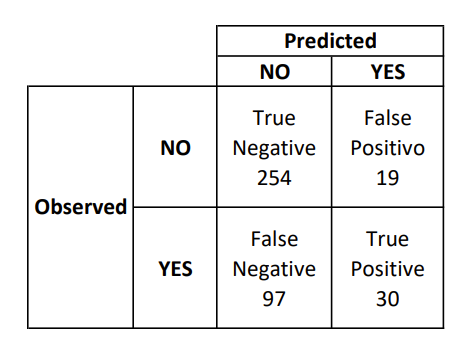

**Accuracy**

Accuracy=TP+TN/(TN+FP+FN+TP)

In [91]:
accuracy=round(sum(diag(matrix_val))/sum(matrix_val),2)
accuracy

[1] 0.71

**Sensibilidad (True Positive Rate, Recall)**

Sensibilidad=TP/(TP+FN)

**Especificidad (False Positive Rate**

Especificidad=TN/(TN+FP)

**Valor predictivo positivo (Precision)**

VPP=TP/(TP+FP)

**¿Valor predictivo negativo?**

¿Cómo afecta nuestro punto de corte de probabilidad -para clasificar Y=1- las métricas anteriores?